# Import các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import seaborn as sns
import tensorflow as tf

import matplotlib.dates as dates
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

MessageError: Error: credential propagation was unsuccessful

# Load dữ liệu

In [4]:
df = pd.read_csv("/NFLX.csv")

In [5]:
data = df.copy()

In [6]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


#Trực quan hóa dữ liệu

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [8]:
cm = sns.light_palette("green", as_cmap=True)
df.head(5).style.background_gradient(cmap=cm)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


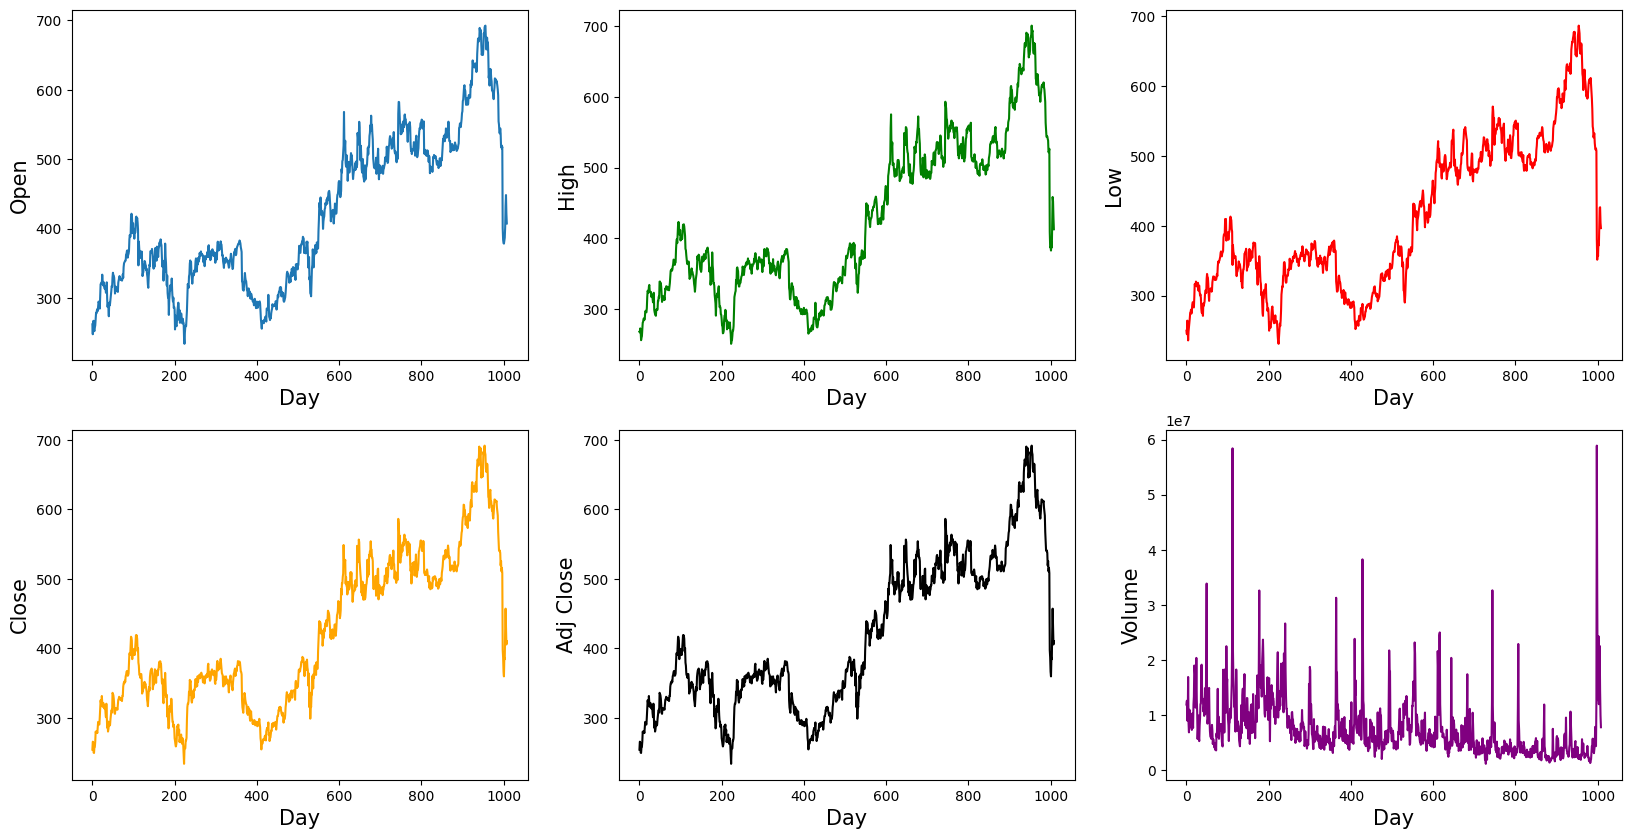

In [9]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 10))

ax1.plot(df['Open'])
ax1.set_xlabel("Day", fontsize=15)
ax1.set_ylabel("Open", fontsize=15)

ax2.plot(df['High'], color='green')
ax2.set_xlabel("Day", fontsize=15)
ax2.set_ylabel("High", fontsize=15)

ax3.plot(df['Low'], color='red')
ax3.set_xlabel("Day", fontsize=15)
ax3.set_ylabel("Low", fontsize=15)

ax4.plot(df['Close'], color='orange')
ax4.set_xlabel("Day", fontsize=15)
ax4.set_ylabel("Close", fontsize=15)

ax5.plot(df['Adj Close'], color='black')
ax5.set_xlabel("Day", fontsize=15)
ax5.set_ylabel("Adj Close", fontsize=15)

ax6.plot(df['Volume'], color='purple')
ax6.set_xlabel("Day", fontsize=15)
ax6.set_ylabel("Volume", fontsize=15)

plt.show()

#Tiền xử lý dữ liệu

In [ ]:
print(df.columns)
print(df.shape)
std = StandardScaler()
df.drop([
    'Date'
],axis = 1, inplace = True)
df = std.fit_transform(df)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
(1009, 7)


In [ ]:
new_data = pd.DataFrame(df)
new_data.head()

,0,1,2,3,4,5
0,-1.447772,-1.441465,-1.510141,-1.522047,-1.522047,0.791791
1,-1.579589,-1.452453,-1.556931,-1.416167,-1.416167,0.919875
2,-1.405553,-1.399802,-1.377121,-1.426885,-1.426885,0.258257
3,-1.400944,-1.444029,-1.510420,-1.560481,-1.560481,0.317787
4,-1.522898,-1.552262,-1.639627,-1.566302,-1.566302,1.709045


#Chia tập huấn luyện

In [ ]:
Y = new_data[3]
X = new_data.drop([3], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
ms = []
ma = []
ac = []
mse = mean_squared_error
mae = mean_absolute_error

In [ ]:
def model_training_and_score(model):
    model.fit(X_train, y_train)
    # y_pred = np.nan_to_num(model.predict(X_test))
    y_pred = model.predict(X_test)
    print('Mean Squared Error: ', mse(y_test, y_pred))
    print('Mean Absolute Error: ', mae(y_test, y_pred))
    # score = model.score(X_test, y_test)
    # print('Accuracy Score: ', score)
    ms.append(mse(y_test, y_pred))
    ma.append(mae(y_test, y_pred))
    # ac.append(score)


In [ ]:
def model_accuracy_score(model):
    model.fit(X_train, y_train)
    # y_pred = np.nan_to_num(model.predict(X_test))
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    print('Accuracy Score: ', score)
    ac.append(score)

#1. Random Forest regressor

In [ ]:
model = RandomForestRegressor(n_estimators = 5)
model_training_and_score(model)
model_accuracy_score(model)

Mean Squared Error:  0.0003056831019657408
Mean Absolute Error:  0.007771235311609503
Accuracy Score:  0.9996920856958365


#2. Decision Tree Regressor

In [ ]:
model = DecisionTreeRegressor()
model_training_and_score(model)
model_accuracy_score(model)

Mean Squared Error:  0.0006104191593418257
Mean Absolute Error:  0.00851225653564859
Accuracy Score:  0.9998007255639034


#3. K Neighbors Regressor

In [ ]:
model = KNeighborsRegressor()
model_training_and_score(model)
model_accuracy_score(model)

Mean Squared Error:  0.004458800920035397
Mean Absolute Error:  0.03804308259657767
Accuracy Score:  0.9953639070117545


#Vẽ biểu đồ tổn thất của các mô hình khác nhau

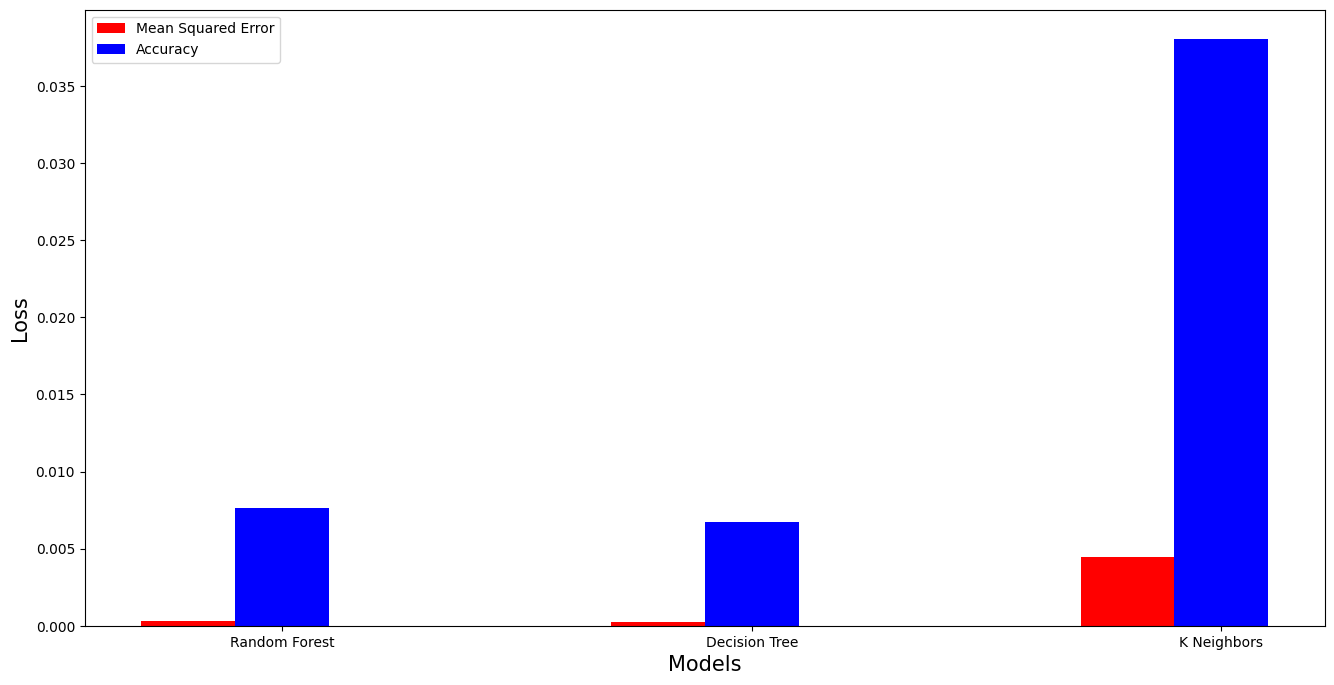

In [ ]:
barwidth = 0.2
fig = plt.subplots(figsize =(16, 8))
br1 = np.arange(len(ms))
plt.bar(np.arange(len(ms)), ms, color = 'red', width = barwidth, label='Mean Squared Error')
br2 = [x + barwidth for x in br1]
plt.bar(br2, ma, color='blue', width=barwidth, label='Accuracy')
plt.xlabel("Models", fontsize = 15)
plt.ylabel("Loss", fontsize = 15)
models = ["Random Forest", "Decision Tree", "K Neighbors"]
plt.xticks([r + barwidth for r in range(len(ms))],models)
plt.legend()
plt.show()



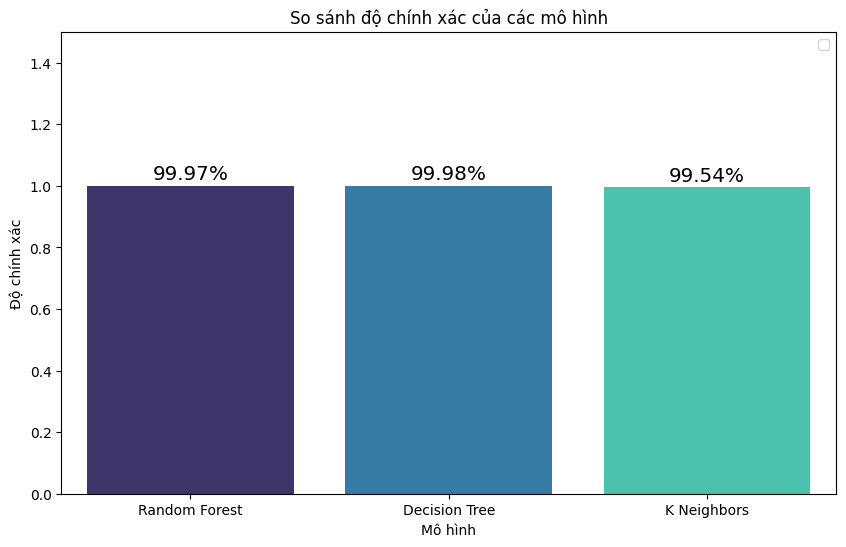

In [ ]:
classifiers = ["Random Forest", "Decision Tree", "K Neighbors"]

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=classifiers, y=ac, palette = "mako", saturation =1.5)
plt.xlabel('Mô hình')
plt.ylabel('Độ chính xác')
plt.title('So sánh độ chính xác của các mô hình')
plt.legend()
plt.ylim(0, 1.5)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

#4. LTMS

In [ ]:
data.shape

(1009, 7)

In [ ]:
df=data["Close"]

In [ ]:
scaler=MinMaxScaler((0,1))
data=scaler.fit_transform(np.array(df).reshape([df.shape[0],1]))

In [ ]:
time_step=100
def createData(data):
    x=[]
    y=[]
    for i in range(len(data)-time_step-1):
        x.append(data[i:(i+time_step)])
        y.append(data[i+time_step])
    return x,y

In [ ]:
x,y=createData(data)

In [ ]:
x=np.array(x)
x=x.reshape(x.shape[0],x.shape[1],1)
y=np.array(y)

In [ ]:
xtrain,xtest,ytrain,ytest=x[:int(df.shape[0]*0.8)],x[int(df.shape[0]*0.8):],y[:int(df.shape[0]*0.8)],y[int(df.shape[0]*0.8):]

In [ ]:
model=Sequential([
    LSTM(128,return_sequences=True,input_shape=xtrain[0].shape),
    LSTM(64,return_sequences=True),
    LSTM(32),
    Dense(16,activation="relu"),
    Dense(1)
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss="mean_squared_error",metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
model.fit(xtrain,ytrain,epochs=100)

Epoch 1/100
26/26 [==============================] - 13s 221ms/step - loss: 0.0258 - root_mean_squared_error: 0.1608
Epoch 2/100
26/26 [==============================] - 9s 342ms/step - loss: 0.0034 - root_mean_squared_error: 0.0583
Epoch 3/100
26/26 [==============================] - 6s 224ms/step - loss: 0.0029 - root_mean_squared_error: 0.0537
Epoch 4/100
26/26 [==============================] - 7s 272ms/step - loss: 0.0034 - root_mean_squared_error: 0.0580
Epoch 5/100
26/26 [==============================] - 6s 223ms/step - loss: 0.0027 - root_mean_squared_error: 0.0515
Epoch 6/100
26/26 [==============================] - 7s 272ms/step - loss: 0.0027 - root_mean_squared_error: 0.0516
Epoch 7/100
26/26 [==============================] - 6s 221ms/step - loss: 0.0026 - root_mean_squared_error: 0.0506
Epoch 8/100
26/26 [==============================] - 7s 273ms/step - loss: 0.0024 - root_mean_squared_error: 0.0489
Epoch 9/100
26/26 [==============================] - 6s 220ms/step - lo

In [ ]:
model.evaluate(xtest,ytest)

4/4 [==============================] - 2s 108ms/step - loss: 0.0023 - root_mean_squared_error: 0.0483


[0.0023334315046668053, 0.04830560460686684]

In [ ]:
trainPred=scaler.inverse_transform(model.predict(xtrain)).squeeze()
testPred=scaler.inverse_transform(model.predict(xtest)).squeeze()

4/4 [==============================] - 0s 106ms/step


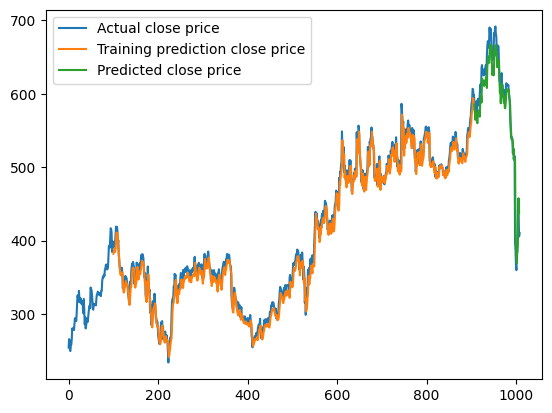

In [ ]:
look_back=time_step
trainPredPlot=np.empty_like(df)
trainPredPlot[:]=np.nan
trainPredPlot[look_back:len(trainPred)+look_back]=trainPred
testPredPlot=np.empty_like(df)
testPredPlot[:]=np.nan
testPredPlot[len(trainPred)+look_back:len(trainPred)+look_back+len(testPred)]=testPred

plt.plot(df,label="Actual close price")
plt.plot(trainPredPlot,label="Training prediction close price")
plt.plot(testPredPlot,label="Predicted close price")
plt.legend()
plt.show()

#Dự đoán 30 ngày tiếp theo

In [ ]:
input_data=np.array(df[-time_step:])
input_data=input_data.reshape([input_data.shape[0],1])

In [ ]:
def predict(data,days=30):
    data=scaler.transform(data)
    predictions=[]
    i=1
    while(i<=days):
        nxtday=model.predict([data],verbose=0)
        predictions.append(scaler.inverse_transform(nxtday)[0])
        data[:-1]=data[1:]
        data[-1]=nxtday[0]
        i+=1
    return np.array(predictions).squeeze()

In [ ]:
days=30
predictions=predict(input_data,days)
# predictions

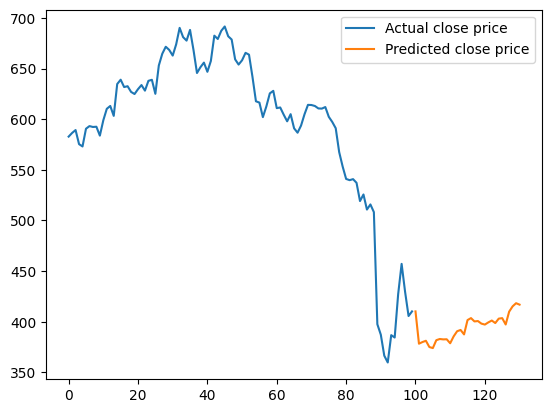

In [ ]:
trainPredPlot=np.zeros(shape=[len(input_data)+1+days])
trainPredPlot[:]=np.nan
trainPredPlot[len(input_data)]=input_data[-1]
trainPredPlot[len(input_data)+1:]=predictions
df_=input_data
plt.plot(df_,label="Actual close price")
plt.plot(trainPredPlot,label="Predicted close price")
plt.legend()
plt.show()